# Import Libraries

In [1]:
from google.colab import drive
import numpy as np
import cv2
from glob import glob
from skimage import exposure
import json
import matplotlib.pyplot as plt


In [2]:
drive.mount('/drive') # connect to google drive

MainFolderAddress = "/drive/MyDrive/RailObjectDetection" # main folder path

Mounted at /drive


# Pre Processing Functions *

In [3]:
def normalize_image(img): #-----Normalize Image-----
  # formula =>   ( (image - min_image) / max_image ) * 255
  img = img - np.min(img)
  img = img / np.max(img)
  img = np.uint8(img*255)
  return img



def adjust_gamma(image, gamma=1.2): #-----Adjust Gamma-----
  # improve the light of image
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)


# opencv -> Blue Green Red
# RGB -> Red Green Blue

def gray_image(Img): #-----Conver to Gray-----
  x,y,z = Img.shape
  if z == 3: # if RGB then convert to Grayscale
    Img_out = cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY)
  else:
    Img_out = Img
  return Img_out



def resize_image(Img,s1,s2): #-----Gray Image-----
  Img = cv2.resize(Img,(s1,s2))
  return Img



def plot_image(img , title=""):#-----Plot 1 RGB Image-----
  plt.figure()
  plt.imshow(img)
  plt.title(title)



def plot_side_by_side(img1, img2 , title1="", title2="", isGray1 = False, isGray2 = False): #-----Plot 2 RGB/Gray Images-----
  plt.figure()
  plt.subplot(1,2,1)
  if isGray1:
    plt.imshow(img1,cmap="gray")
  else:
    plt.imshow(img1)
  plt.title(title1)

  plt.subplot(1,2,2)
  if isGray2:
    plt.imshow(img2,cmap="gray")
  else:
    plt.imshow(img2)
  plt.title(title2)

# Sample Preprocessing

In [4]:
Img = cv2.imread("/drive/MyDrive/RailObjectDetection/Images/0.png")

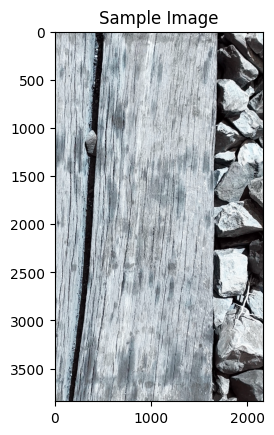

In [5]:
plot_image(Img,"Sample Image")

In [6]:
np.min(Img),np.mean(Img),np.max(Img)

(0, 163.50420576935443, 255)

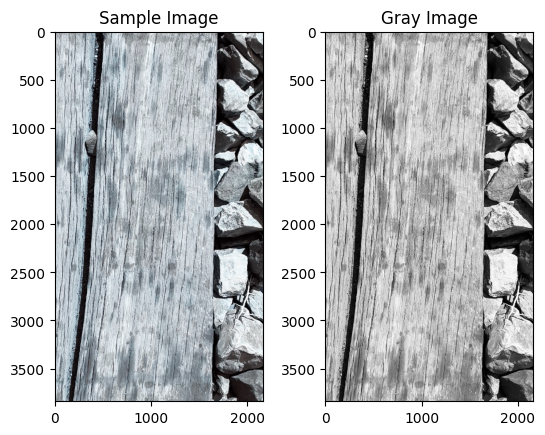

In [15]:
I1 = gray_image(Img)
plot_side_by_side(Img,I1,"Sample Image","Gray Image",False,True)

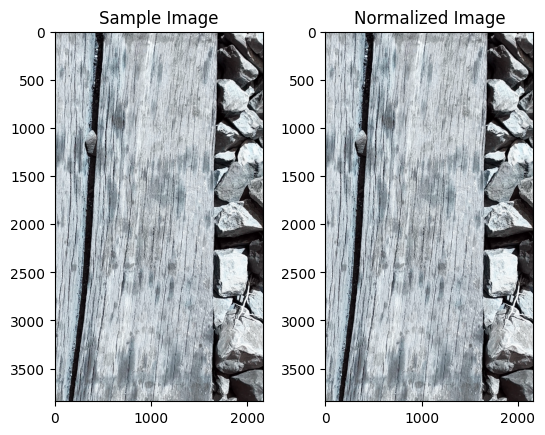

In [16]:
I2 = normalize_image(Img)
plot_side_by_side(Img,I2,"Sample Image","Normalized Image")

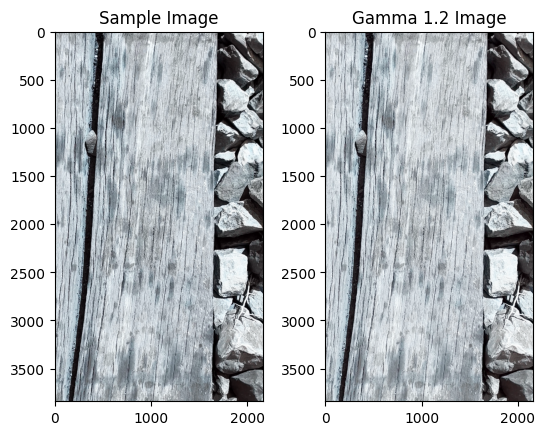

In [18]:
I3 = adjust_gamma(Img, 1.2)
plot_side_by_side(Img,I3,"Sample Image","Gamma 1.2 Image")

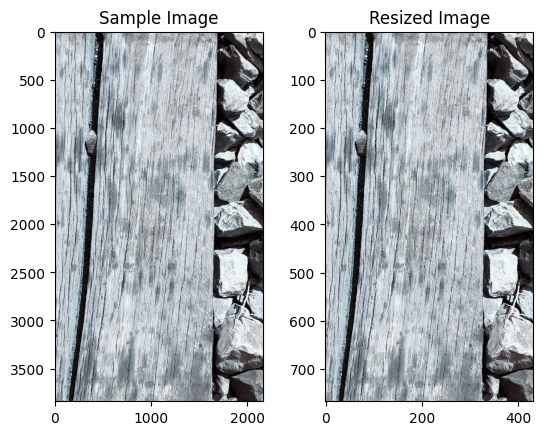

In [17]:
I4 = resize_image(Img,432,768) # (3840, 2160, 3) / 5 = (768, 432, 3)
plot_side_by_side(Img,I4,"Sample Image","Resized Image")

# LOAD DATASET *

In [45]:
def load_dataset_images(address):#-----Loading the Dataset-----
  dataset = []
  dataset_gray = []
  Index = []
  Annotation = []

  Images_Name = glob(f"{address}/Images/*") # collect address of all images
  Images_Name.sort() # sort them

  for I in Images_Name: # for each Image Address

    Img = cv2.imread(I) # Read the Image BGR

    #----------------Preprocess the Image-------------
    Img = resize_image(Img,432,768)
    Img = normalize_image(Img)
    Img = adjust_gamma(Img, 1.2)

    #----------------Add them to Datasets List-------------
    dataset.append(Img)
    dataset_gray.append(gray_image(Img))

  dataset = np.array(dataset) # convert python list to numpy array
  dataset_gray = np.array(dataset_gray)

  with open(f"{address}/index.json", "r") as file: # load the index file
    Index = file.read() # read it as text
    Index = json.loads(Index) # convert text to json

  with open(f"{address}/annotations.json", "r") as file: # load the annotations file
    Annotation = file.read() # read it as text
    Annotation = json.loads(Annotation) # convert text to json

  return dataset,dataset_gray,Index,Annotation # return the datasets and annotations

In [46]:
dataset, dataset_gray, Index, Annotation = load_dataset_images(MainFolderAddress) # run the dataset function

# Sample Dataset

In [49]:
dataset.shape,  dataset_gray.shape

((530, 768, 432, 3), (530, 768, 432))

In [57]:
len(Index),len(Annotation[0])

(530, 4)

In [ ]:
Index

In [ ]:
Annotation